<a href="https://colab.research.google.com/github/mervebudakk/python/blob/main/04_Otsu_E%C5%9Fikleme_Y%C3%B6ntemi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.OTSU EŞİKLEME METODU

  Adını geliştiricisi Nobuyuki Otsu’dan alan yöntem gri tonlamalı bir görüntüyü monokroma dönüştürmek için kullanılan yaygın bir görüntü işleme görevidir. Yöntem sadece renklerin görüntü üzerinde kaçar defa bulunduğuna bakar.Gri seviyedeki bir görüntüyü ikili seviyeye dönüştürülerek kullanılabilecek en uygun eşik değerinin tespitini sağlar.Bu yöntemde, renklerin görüntü üzerinde var olma sayısına bakıldığı için uygulamaların eşik belirleme adımına geçmeden önce renk histogramı hesaplanır ve tüm hesaplamalar bu histogram üzerinden yapılır. Otsu algoritması histogramda eşikleme yapılabilecek en uygun konumun bulunması için kullanılır.

Otsu algoritmasında histogramın her bir elemanını eşik gibi düşünerek her biri için **“weight”**,**mean”** ve **”variance”** diye tabir edilen veriler hem eşikten önce(background) hem de eşikten sonrası(foreground) için hesaplanır.

Her bir eleman eşik kabul edilerek her bir eleman için hesaplamalar yapılacağı için belirlenen elemandan öncesi eşik öncesi(background),belirlenen elemandan sonrası eşik sonrası(foreground) olarak adlandırılır.


##1.1Örnekler Üzerinden Formüllerin Kullanılması ve Çıkarılması
<br/>



                






In [ ]:
#Google Drive'ınızı bağlamak için kullanılır.
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/mervebudakk/python/master/images/cicek.png')

>>>>**Şekil 1.1**

Şekil 1.1’de 6 tonlu bir görüntü ve histogramı bulunmaktadır.


##1.1.1 Eşik öncesi değerleri hesaplamak için kullanılan formüller(background):


In [ ]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/mervebudakk/python/master/images/otsuBG.png')




>>>**Şekil 1.2**
<br/>

**weight(background)** = Seçilen histogram elemanına kadar olan elemanların piksel sayıları toplamı(kendisi dahil değil) / toplam piksel sayısı

**mean(background)** = Kendinden önceki her eleman için(histogram elemanı*histogram elemanının değeri) toplamları / seçilen histogram elemanına kadar olan elemanların piksel sayıları toplamı(kendisi dahil değil)

**variance(background)** = kendinden önceki her eleman için histogram elemanı-mean(background * (histogram elemanı-mean(background)) * histogram elemanının değeri / seçilen histogram elemanına kadar olan elemanların piksel sayıları toplamı(kendisi dahil değil)



In [ ]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/mervebudakk/python/master/images/frml.png')

##1.1.2 Eşik sonrası değerleri hesaplamak için kullanılan formüller(foreground):

In [ ]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/mervebudakk/python/master/images/otsufg.png')

>>>**Şekil 1.3**

**weight(foreground)**= seçilen histogram elemanından itibaren elemanların piksel sayıları toplamı(kendisi dahil) / toplam piksel sayısı

**mean(foreground)**= kendinden sonraki her eleman için(histogram elemanı * histogram elemanının değeri) toplamları / seçilen histogram elemanından itibaren elemanların piksel sayıları toplamı(kendisi dahil)

**variance(foreground)**= kendinden sonraki her eleman için histogram elemanı-mean(background*(histogram elemanı-mean(background))*histogram elemanının değeri / seçilen histogram elemanından itibaren elemanların piksel sayıları toplamı(kendisi dahil)









In [ ]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/mervebudakk/python/master/images/otsufrml2.png')

Bu üretilen “weight”,”mean” ve “variance” değerleri kullanılarak “within class variance” ve “ between class variance” değerleri hesaplanır.

Yani sınıf içi global varyans ve sınıflar arası global varyans hesaplanır.

Bu hesaplamalardan elde edilen değerler içerisinden sınıflar arasındaki yoğunluk değerleri için en iyi ayrımı en küçük sınıf içi global varyans ya da en büyük sınıflar arası global varyans değerini veren eşik değeri optimum eşik değeri seçilir.


**within class variance**= (weight(background) * variance(background)) +(weight(foreground) * variance(foreground))

**between class variance**= weight(background) * weight(foreground) * (mean(background)-mean(foreground)) * (mean(background)-mean(foreground))


In [ ]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/mervebudakk/python/master/images/forml4.png')

In [ ]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/mervebudakk/python/master/images/frml3.png')

Eşik seçiminde önce sınıflar arası varyansın(between class variance) maksimum değeri değerlendirilir. Bu eşiğin öncesinde kalan (background) kısımlardaki değerler “0” diğerleri “1” yani (255) olarak görüntüler düzenlenir.

##1.2 Python ile Otsu Eşikleme Metodu Uygulaması

In [ ]:
from PIL import Image
from IPython.display import display

#PIL modülünden Image kütüphanesi uygulamaya dahil edilir.

In [ ]:
import requests
from PIL import Image
from io import BytesIO

url = 'https://raw.githubusercontent.com/mervebudakk/python/master/images/cicek.jpg'
response = requests.get(url)

resim = Image.open(BytesIO(response.content))

#resim değişkeninin içerisine belirtilen klasörde bulunan 'otsu' adlı resim dosyası atılır.


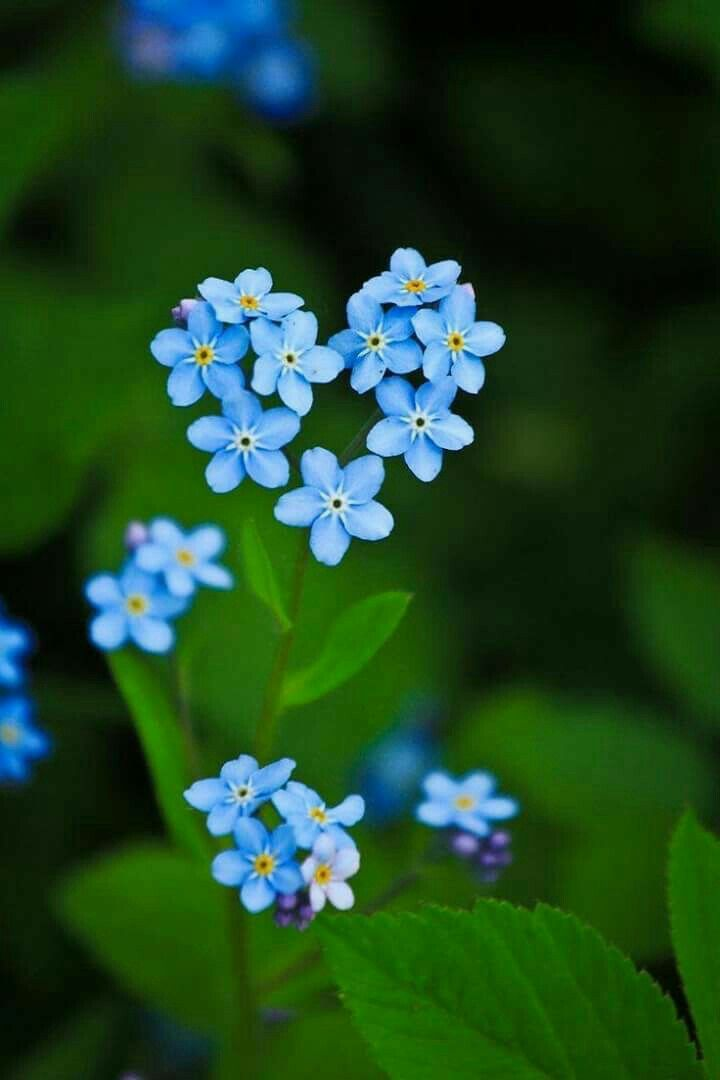

In [ ]:
#@title cicek.jpg dosyanın orjinal hali
display(resim)


In [ ]:
newmat = resim.load()
#newmat adlı yeni bir matris oluşturup bunun içerisine resim dosyası yüklenir.
w = resim.size[0]
#w değişkenine resim dosyasının genişlik boyutu atılır. Dosyanın genişliği 640 piksel.
h = resim.size[1]
#h değişkenine resim dosyasının yükseklik boyutu atılır. Dosyanın  yüksekliği 360 piksel
graylist = [[0]*h for x in range (w)]
#graylist adında tanımlanan matrisin boyutu yukarıda alınan resim dosyasının genişlik ve yükseklik değerlerine göre belirlenir.
for x in range (w):
#Otsu metodu gri seviye görüntüler üzerinde çalıştığı için resim dosyasını gri tonlarına çevirmek için iç içe döngü ile matrise çekilir. Böylece her bir piksel birer matris elemanı olacaktır.
     for y in range (h) :
          r,g,b = resim.getpixel((x,y))
#Her pikselde birer r(kırmızı),g(yeşil),b(mavi) değeri bulunmaktadır. Bunlar o piksele renk veren kodlardır. Öncelikle 'getpixel' fonksiyonu ile bu değerleri r,g,b değişkenlerine atılır.
          gray=(int)((r*0.2126)+(g*0.7152)+(b*0.0722))
#Resmi gri yapacak olan sayısal değeri elde etmek için, insan gözünün gama ışınlarını algılama oranlarına göre oluşturulan formül ile alınan katsayıları r,g,b değişkenleriyle çarpılıp toplanır. Böylece resimdeki her piksel için ayrı bir gri renk tonu elde etmiş olunur.
          graylist[x][y] = gray
#graylist matrisinin her elemanına ağırlık toplama yöntemi ile bulunan gri değerleri kaydedilir.
          newmat[x,y]= (gray,gray,gray)
#Resim dosyasını yüklenen matrisin tüm elemanlarına(piksellerine) ağırlık toplama yöntemine göre bulunan gri renk kodu atılır. Böylece resmin her pikseli renk tonuna göre gri rengini almış olacaktır. Burada kırmızı, yeşil, mavi renk tonlarının hepsine aynı değer atılır. Bu yöntem gri rengini elde etmemizi sağlar.
resim.save("/content/cicek_gri.jpg")

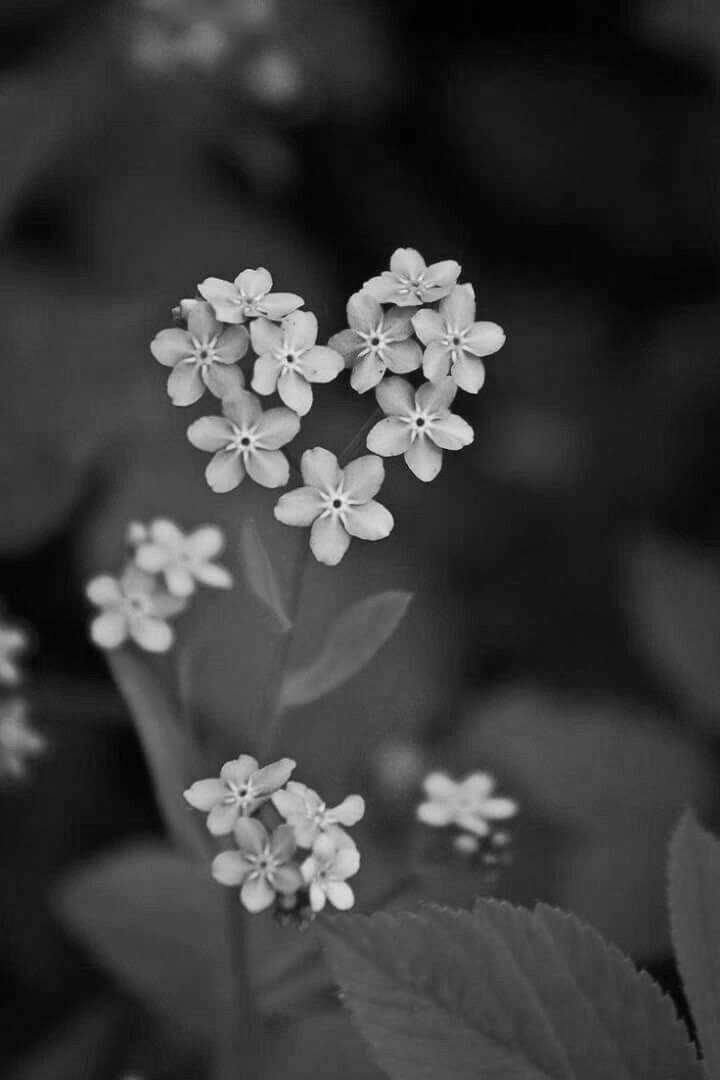

In [ ]:
#@title Oluşacak cicek_gri.jpg dosyası
display(resim)

In [ ]:
def histogram(resim):
#Histogram fonksiyonu renklerin görüntü üzerindeki sayısını bulmak için kullanılır. Bu metod bir resim parametresi ile çalışmaktadır.
     width = resim.size[0]
#Parametre olarak alınan  resim dosyasının ilk elemanı olan genişlik boyutunu 'width' değişkenine atılır.
     height = resim.size[1]
#Parametre olarak alınan resim dosyasının ikinci elemanı olan yükseklik boyutunu 'height' değişkenine atılır.
     histogram = [0]*256
#histogram adında bir matris tanımlanır. Bu matris renk sayılarını tutulacağı  grafiktir
     for x  in range(height):
#Görüntünün tüm piksellerini yani matrisin elemanlarını dolaşmak için genişlik ve yükseklik değerleriyle iç içe döngü kullanılır.
          for y in range(width):
               a,b,c = resim.getpixel((y,x))
#resim değişkeninin her pikselinde bulunan sayısal değerleri çekip a,b,c değişkenlerine atılır. Burada gelen değer örnek olarak :(200,200,200) şeklindedir. Çünkü ağırlık toplama yönteminden sonra her pikselde aynı sayısal değer yani aynı tonlar bulunur.
               histogram[a] = histogram[a]+1
#Bulunan üç değerden herhangi birini kullanarak histogramda toplanan renk sayısı bir arttırılır.
     return histogram
#Geri dönüş değeri olan histogramda iç içe döngülerin sonucunda resmin üzerinde bulunan her pikseldeki renk tonunu ayrı ayrı tutulmuş oldu..


In [ ]:
def Otsu (resim):
#Otsu algoritmasının kullanılacağı fonksiyon. 'otsu_thrd' adlı metodun resim parametresi ile çalıştırılmaktadır.
     hist = histogram(resim)
#Otsu metodunun en önemli özelliği olan histogram yani renk sayısını bulmak için ilk olarak parametre olan 'resim' değişkeni histogram fonksiyonuna gönderilir. Geri dönen matris değerini 'hist' adında bir matrise atılır.
     sum_all = 0
#'sum_all' adlı değişkeni toplam indis sayısını tutması için tanımlandı.. İlk değer olarak '0' atandı..
     for t in range(256):
#Histogramdan gelen matris indislerindeki toplam değeri almak için döngü oluşturulur.
          sum_all+=t*hist[t]
     sum_back = 0
#Kendisi ve kendisinden önceki indisteki elemanların değerler toplamını tutacak değişken.
     w_back = 0
#Bulunan eşik değerinden önceki değerler için weight değerini tutacak değişken.
     w_fore =0
#Bulunan  eşik değerinden sonraki değerler için weight değerini tutacak değişken.
     mean_back = 0
#Bulunan eşik değerinden önceki değerler için mean değerini tutacak değişken.
     mean_fore = 0
#Bulunan eşik değerinden sonraki değerler için mean değerini tutacak değişken.
     var_max = 0
#Histogram elemanları arasındaki en yüksek varyans değerini tutacak değişken.
     var_between = 0
#Histogramdaki her renk tonu için sınıflar arası varyans değerini tutacak değişken.
     threshold = 0
#Threshold işlemini yapacak olan yani otsu metodunun asıl amacı olan eşik değerini tutacak değişken.
     total =resim.size[0]*resim.size[1]
#'total' değişkeninde görüntünün genişlik*yükseklik değerleri yani toplam alanı bulunmaktadır.
     for t in range(256):
#Histogram üzerindeki tüm değerleri ulaşmak için döngü oluşturulur.
          w_back +=hist[t]
#Eşik değerinden önceki tüm değerler sırasıyla 'w_back' değişkeninde toplanır.
          if(w_back == 0):
#Mean değerini hesaplarken paydada kullanılacak 'w_back' değerinin 0 olması durumu kontrol edilir. 0 ise döngüde sıradaki değer ile devam edilir.
            continue
          w_fore = total-w_back
#Eşik değerinden sonraki weight değerlerin bulunması için toplam değerinden bulunan  önceki weight değerleri çıkarılır.
          if(w_fore == 0):
#Mean değerini hesaplarken paydada kullanılacak 'w_fore' değerinin 0 olması durumu kontrol edilir. 0 ise döngüde sıradaki değer ile devam edilir.
            continue
          sum_back += t*hist[t]
#Histogramda kendisi ve kendisinden önceki tüm elemanların indisleri ile çarparak toplanır.
          mean_back = sum_back/w_back
#Histogramda kendisinden önce bulunan toplam değerleri kendisinden önceki weight değerlerine bölerek her indis için kendisinden önceki mean değeri hesaplanır.
          mean_fore=(sum_all-sum_back)/w_fore
#Histogramda kendisinden sonra bulunan toplam değerleri kendisinden sonraki weight değerlerine bölerek her indis için kendisinden sonraki mean değerini hesaplanır.
          var_between = w_back * w_fore * (mean_back-mean_fore)**2
#Varyans formülünü kullanarak histogramdaki her eleman için renk tonları arasında varyans hesaplaması yapılır.
          if(var_between>var_max):
#Burada amaç büyük ama en ideal eşik değerini bulmak. Bu yüzden sınıflar arası yani histogramda elemanlarımız arasındaki renk tonlarının varyans değerini hesaplandı. Bu yüzden en yüksek varyans değerine sahip olan elemanı bulunup bulunmadığı kontrol edilir.
            var_max=var_between
#Bulunan  varyans değeri en yüksek ise 'var_max' değişkeninde saklanır.
            threshold = t
#En yüksek varyansa sahip olan histogram elemanının indisini de eşik değeri olarak 'threshold' değişkenine atılır.
     return threshold


In [ ]:
res = Image.open("/content/cicek_gri.jpg")

In [ ]:
otsu_th = Otsu(res)
#Açılan resim dosyasının eşik değerini bulmak için Otsu fonksiyonuna gönderilir. Geri dönen değeri 'otsu_th' değişkenine atılır
otsu_im = res.load()
#Açılan resim dosyasını 'otsu_im' matrisine yüklenir.
print (otsu_th)
#Dönen eşik değerini görmek için ekrana yazdırılır.
for x in range(w):
#İç içe döngü ile en başta kullanılan 'graylist' üzerindeki tüm elemanlara ulaşılır ve her eleman için kontrol gerçekleştirilir.
    for y in range(h):
        if graylist[x][y]<otsu_th:
#Eğer elemanın değeri bulunan eşik değerinden küçük ise resmi yüklediğimiz 'otsu_im'  matrisinin elemanına renk kodu olarak siyah(0,0,0) değeri atılır.
            otsu_im[x,y] =(0,0,0)
            if graylist[x][y]>otsu_th:
#Eğer elemanın değeri bulunan eşik değerinden büyük ise resm yüklediğimiz 'otsu_im' matrisinin elemanına renk kodu olarak beyaz(255,255,255) değerini atılır.
                otsu_im[x,y]=(255,255,255)
res.save("/content/cicek_yeni.jpg")
#Otsu algoritmasıyla işlenen görüntü, projenin belirtilen adresine kaydedilir.


105


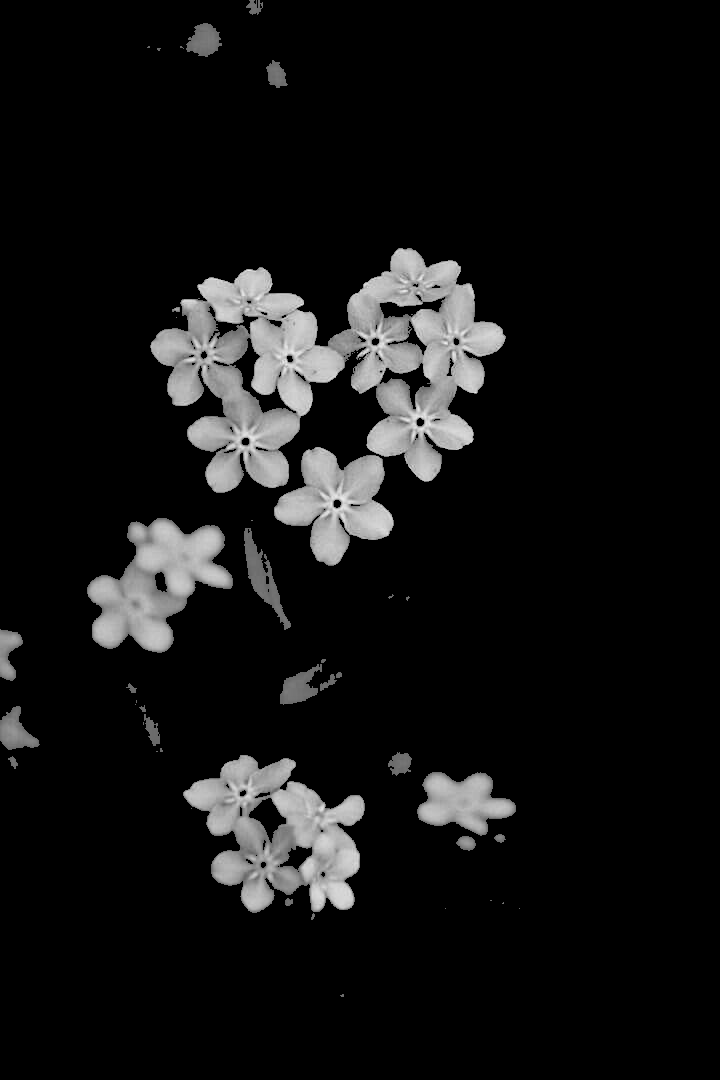

In [ ]:
#@title cicek_yeni.jpg dosyanın orjinal hali
display(res)